# 네트워크 분석

In [1]:
import networkx as nx           #NetworkX 모듈 불러오기
import matplotlib.pyplot as plt 

* 네트워크 생성 및 시각화

In [2]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4])
G.add_edges_from([(1,2),(1,3),(2,3),(3,4)])

In [3]:
G.nodes()

NodeView((1, 2, 3, 4))

In [4]:
G.edges()

EdgeView([(1, 2), (1, 3), (2, 3), (3, 4)])

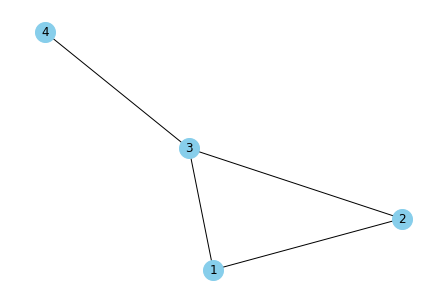

In [5]:
nx.draw(G, with_labels=True, node_size=400, node_color='skyblue')
plt.show()

* 노드 차수 구하기

In [6]:
import numpy as np
degrees = dict(G.degree())
print(degrees)
print(degrees[4]) #노드 4번의 차수

{1: 2, 2: 2, 3: 3, 4: 1}
1


In [7]:
np.mean(list(degrees.values()))

2.0

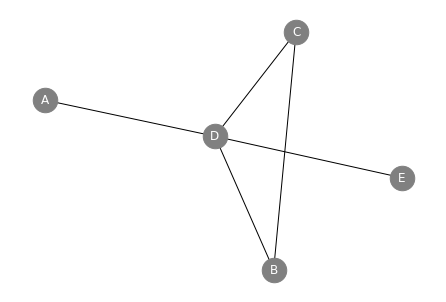

In [8]:
G = nx.Graph()
G.add_nodes_from(['A','B','C','D','E'])
G.add_edges_from([('A','D'),('B','D'),('B','C'),('C','D'),('D','E')])
nx.draw(G, with_labels=True, node_size=600, node_color='gray', font_color="white")
plt.show()

In [9]:
degrees = dict(G.degree())
print(degrees)

{'A': 1, 'B': 2, 'C': 2, 'D': 4, 'E': 1}


## 노드 중심성
  * 노드 중심성을 계산할 네트워크 생성

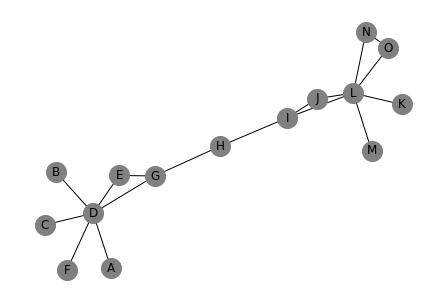

In [10]:
G = nx.Graph()  #네트워크 생성
nodes = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O'] #노드들
edges = [('A','D'),('B','D'),('C','D'),('F','D'),('E','D'),('G','D'),('E','G'),('G','H'),('H','I'),
('I','L'),('J','L'),('K','L'),('M','L'),('N','L'),('O','L'),('I','J'),('N','O')]  #엣지들
G.add_nodes_from(nodes)
G.add_edges_from(edges)
pos = nx.spring_layout(G)                   # 노드들 그림 그릴 위치 고정 (위치정보)
nx.draw(G, pos=pos, with_labels=True, node_size=400, node_color='gray')
plt.show()

* 차수 중심성
  * nx.degree_centrality(G)

{'A': 0.07142857142857142, 'B': 0.07142857142857142, 'C': 0.07142857142857142, 'D': 0.42857142857142855, 'E': 0.14285714285714285, 'F': 0.07142857142857142, 'G': 0.21428571428571427, 'H': 0.14285714285714285, 'I': 0.21428571428571427, 'J': 0.14285714285714285, 'K': 0.07142857142857142, 'L': 0.42857142857142855, 'M': 0.07142857142857142, 'N': 0.14285714285714285, 'O': 0.14285714285714285}


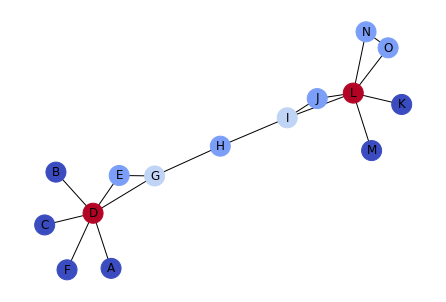

In [13]:
print(nx.degree_centrality(G))  # 차수 중심성 = 차수 / (전체 노드 수 - 1)
nx.draw(G, pos=pos, with_labels=True, node_size=400, node_color=list(nx.degree_centrality(G).values()), cmap = 'coolwarm')
# 네트워크 그림 그리기: 차수 중심성 값에 따라 다른 색깔로
plt.show()

* 매개 중심성
  * nx.betweenness_centrality(G)

{'A': 0.0, 'B': 0.0, 'C': 0.0, 'D': 0.5054945054945056, 'E': 0.0, 'F': 0.0, 'G': 0.5274725274725275, 'H': 0.5384615384615385, 'I': 0.5274725274725275, 'J': 0.0, 'K': 0.0, 'L': 0.4945054945054945, 'M': 0.0, 'N': 0.0, 'O': 0.0}


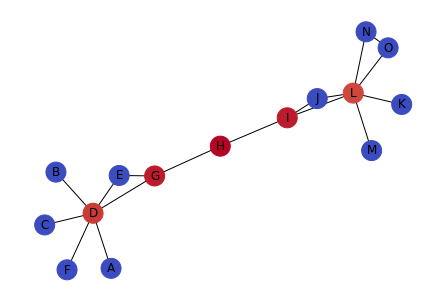

In [14]:
print(nx.betweenness_centrality(G))  # 매개 중심성 
nx.draw(G, pos=pos, with_labels=True, node_size=400, node_color=list(nx.betweenness_centrality(G).values()), cmap = 'coolwarm')
# 네트워크 그림 그리기: 매개 중심성 값에 따라 다른 색깔로
plt.show()

# 커뮤니티 탐지

In [17]:
from networkx.algorithms import community

# 같은 그룹(커뮤니티)이면 같은 색으로 해주는 함수
def get_color_from_partition(partition, G):
    color = dict()
    for idx in range(len(partition)):
        for node in partition[idx]:
            color[node] = idx
    node_color = [color[node] for node in G.nodes()]
    return node_color


* Greedy Modularity Maximization 방법

[frozenset({'B', 'A', 'E', 'C', 'D', 'F', 'G'}), frozenset({'O', 'L', 'N', 'M', 'K'}), frozenset({'J', 'I', 'H'})]


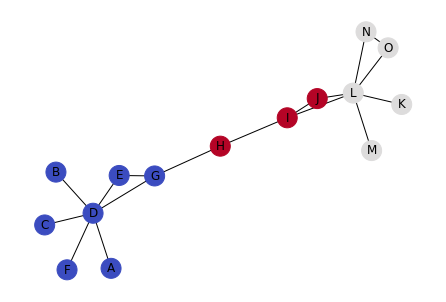

In [20]:
partition = list(community.greedy_modularity_communities(G)) #커뮤니티 개수 지정 안해도 됨
print(partition)
nx.draw(G, pos=pos, with_labels=True, node_size=400, node_color=get_color_from_partition(partition, G), cmap = 'coolwarm')
plt.show()

* Semi-synchoronous label propagation 방법

[{'B', 'E', 'A', 'G', 'C', 'D', 'F'}, {'J', 'L', 'M', 'K', 'O', 'I', 'N', 'H'}]


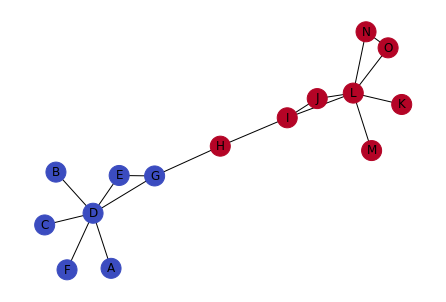

In [21]:
partition = list(community.label_propagation_communities(G)) #커뮤니티 개수 지정 안해도 됨
print(partition)
nx.draw(G, pos=pos, with_labels=True, node_size=400, node_color=get_color_from_partition(partition, G), cmap = 'coolwarm')
plt.show()

[{'B', 'E', 'A', 'G', 'C', 'D', 'F'}, {'J', 'L', 'M', 'K', 'O', 'I', 'N', 'H'}]


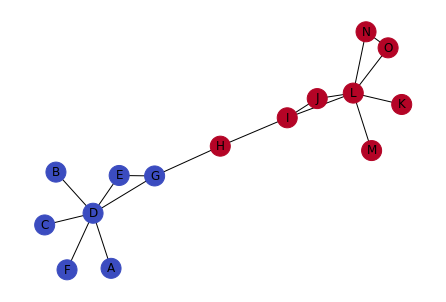

In [26]:
partition = list(community.asyn_fluidc(G, 2)) 
print(partition)
nx.draw(G, pos=pos, with_labels=True, node_size=400, node_color=get_color_from_partition(partition, G), cmap = 'coolwarm')
plt.show()